In [51]:
import pandas as pd
import numpy as np

In [52]:
df =pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [53]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [54]:
df.shape

(195, 43)

In [55]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df.columns = list(map(str,df.columns))
df.set_index('Country',inplace=True)
df['Total']= df.sum(axis=1)
years = list(map(str,range(1980,2014)))
df.shape

(195, 38)

In [56]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.2.2


## pie chart 
is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the kind=pie keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

Step 1: Gather data.

We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

Split: Splitting the data into groups based on some criteria.
Apply: Applying a function to each group independently: .sum() .count() .mean() .std() .aggregate() .apply() .etc..
Combine: Combining the results into a data structure.

In [58]:
df_continent=df.groupby('Continent',axis=0).sum()
type(df_continent)

pandas.core.frame.DataFrame

In [59]:
df_continent.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


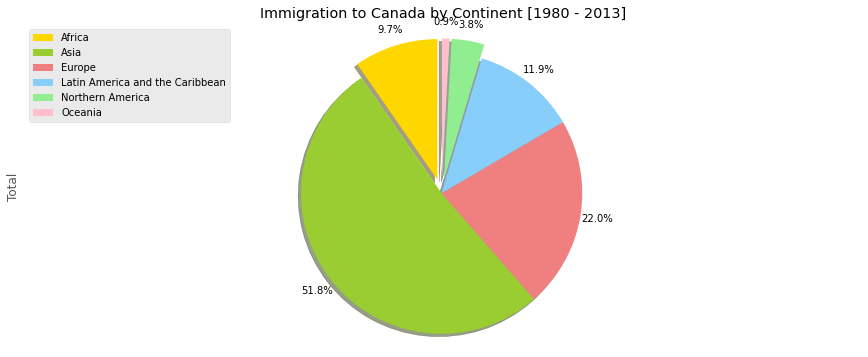

In [60]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continent['Total'].plot(kind='pie',figsize=(15,6),startangle=90,
                           autopct='%1.1f%%', 
                           pctdistance=1.12,
                           labels=None,
                           colors=colors_list,
                           explode=explode_list,
                           shadow=True)
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')
plt.legend(labels=df_continent.index, loc='upper left')
plt.show()

Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

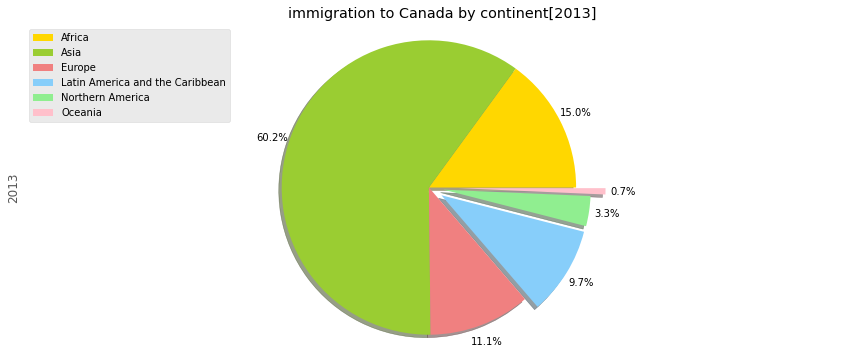

In [61]:
colors_list2 = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list2 = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.
df_continent['2013'].plot(kind='pie',
                         figsize=(15,6),
                         autopct='%1.1f%%',
                         pctdistance=1.12,
                         labels=None,
                         colors=colors_list2,
                         explode=explode_list2,
                         shadow=True)
plt.title('immigration to Canada by continent[2013]')
plt.axis('equal')
plt.legend(labels=df_continent.index,loc='upper left')
plt.show()

# BOXPLOT

In [62]:
df_japan = df.loc[['Japan'],years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


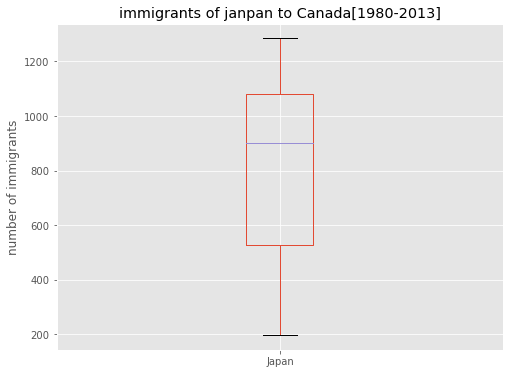

In [63]:
df_japan.plot(kind='box',
             figsize=(8,6))
plt.title('immigrants of janpan to Canada[1980-2013]')
plt.ylabel('number of immigrants')

plt.show()

In [64]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [65]:
df_CI = df.loc[['China','India'],years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


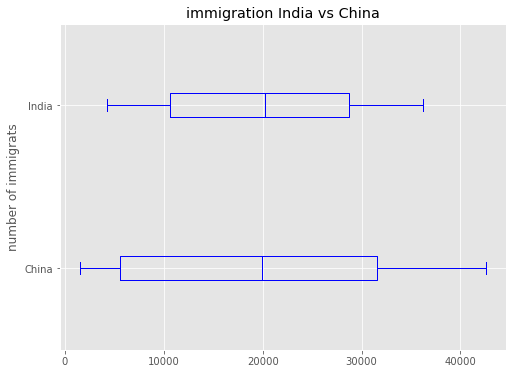

In [66]:
df_CI.plot(kind='box',color='blue', vert=False,
          figsize=(8,6))
plt.title('immigration India vs China')
plt.ylabel('number of immigrats')
plt.show()

In [67]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


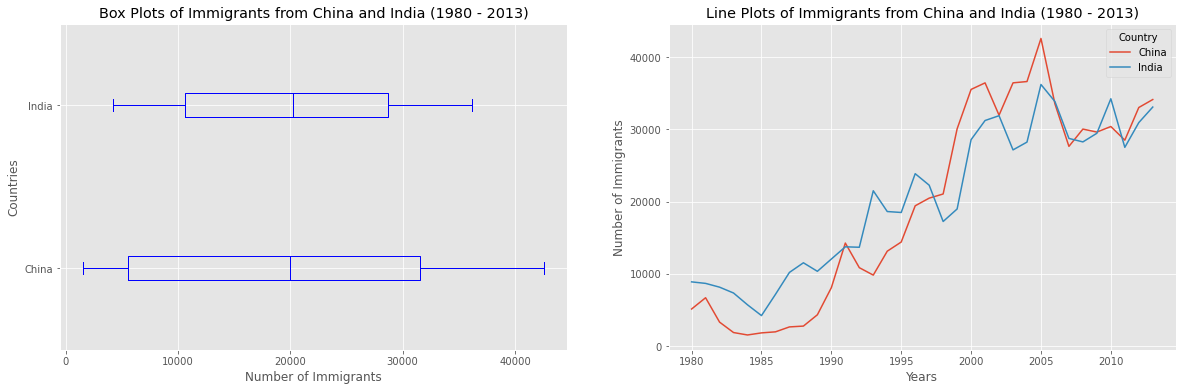

In [68]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

## Question:
Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

step1: Ascending order 15 countries

In [74]:
df_top15=df.sort_values(['Total'], ascending=False,axis=0).head(15)

In [75]:
years_80s= list(map(str, range(1980, 1990)))
years_90s =list(map(str,range(1990, 2000)))
years_2000= list(map(str,range(2000, 2010)))

# slice the original dataframe df to create a series for each decade
df_80s = df_top15.loc[:,years_80s].sum(axis=1)
df_90s = df_top15.loc[:,years_90s].sum(axis=1)
df_2000 = df_top15.loc[:,years_2000].sum(axis=1)

new_df = pd.DataFrame({'1980s':df_80s,'1990s':df_90s,'2000s':df_2000})


In [76]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


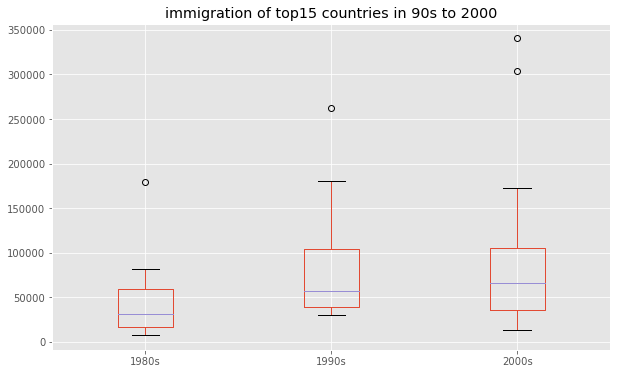

In [77]:
new_df.plot(kind='box',figsize=(10,6))

plt.title('immigration of top15 countries in 90s to 2000')

plt.show()

In [78]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [84]:
# we can use the sum() method to get the total population per year
df_total= pd.DataFrame(df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_total.index= map(int,df_total.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace=True)

# rename columns
df_total.columns=['year','Total']
df_total.head()

,year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


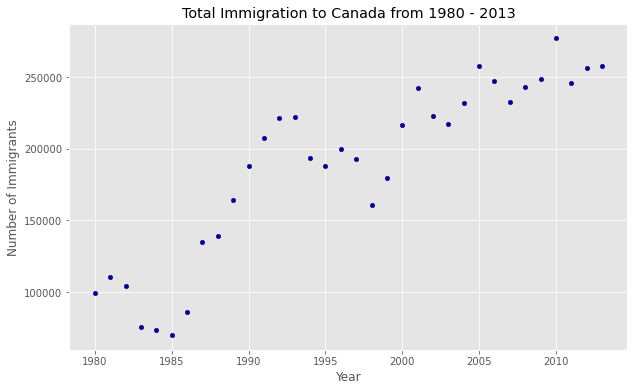

In [86]:
df_total.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

x: x-coordinates of the data.
y: y-coordinates of the data.
deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [87]:
x = df_total['year']
y=df_total['Total']
fit = np.polyfit(x,y,deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

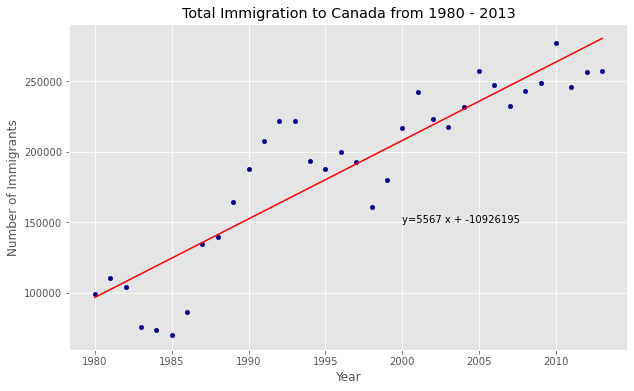

'No. Immigrants = 5567 * Year + -10926195'

In [88]:
df_total.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:

1.  Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
2.  Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
3.  Reset the index in place.
4.  Rename the columns to **year** and **total**.
5.  Display the resulting dataframe.


In [92]:
df_countries = df.loc[['Denmark','Norway','Sweden'],years].transpose()
df_countries

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


In [96]:
df_tot=pd.DataFrame(df_countries.sum(axis=1))
df_tot.reset_index(inplace=True)
df_tot.columns=['year','Total']
df_tot['year']=df_total['year'].astype(int)
df_tot.head()

,year,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


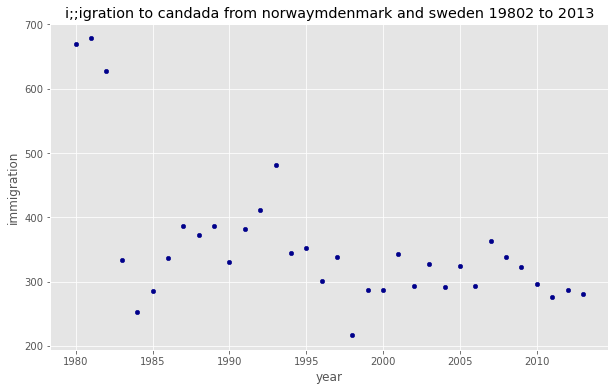

In [97]:
df_tot.plot(kind='scatter', x='year',y='Total',figsize=(10,6),color='darkblue')

plt.title('i;;igration to candada from norwaymdenmark and sweden 19802 to 2013')
plt.xlabel('year')
plt.ylabel('immigration')

plt.show()